In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap

from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords

In [35]:
#Open NetCDF
wrfin = Dataset("wrfdata\\wrfout_d02_2022-11-18_18-00-00")

In [54]:
#Select variable to plot
EFIELD = getvar(wrfin, "ELECMAG")

In [55]:
# Get the latitude and longitude points
lats, lons = latlon_coords(EFIELD)

In [56]:
# Get the cartopy mapping object
bm = get_basemap(EFIELD)

C:\Users\blued\AppData\Local\Temp\ipykernel_14516\3813200143.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bm.contourf(x, y, to_np(EFIELD[0]), 10, cmap=get_cmap("jet"))


X-axis range: 0.0 1063999.2848216663
Y-axis range: 0.0 847999.4002717898


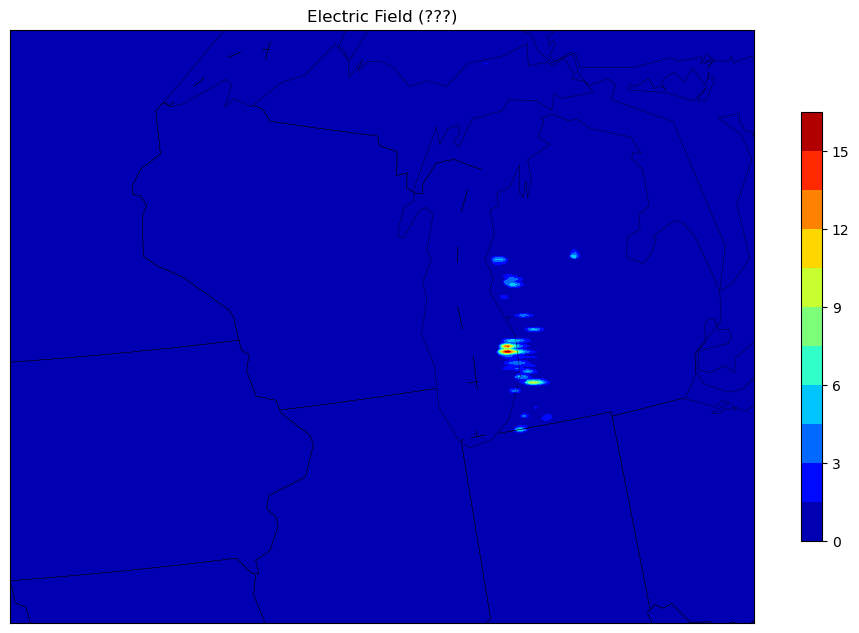

In [57]:
# Create a figure
fig = plt.figure(figsize=(12,9))

# Add geographic outlines
bm.drawcoastlines(linewidth=0.25)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)

# Convert the lats and lons to x and y.  Make sure you convert the lats and
# lons to numpy arrays via to_np, or basemap crashes with an undefined
# RuntimeError.
x, y = bm(to_np(lons), to_np(lats))

# Draw the contours and filled contours
bm.contourf(x, y, to_np(EFIELD[0]), 10, cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(shrink=.62)

# Set x and y limits
ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
print("X-axis range:", x_min, x_max)
print("Y-axis range:", y_min, y_max)
#ax.set_xlim(650000,750000)
#ax.set_ylim(350000,450000)

plt.title("Electric Field (???)")

plt.show()